In [16]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

# Two images
img1 = cv2.imread('../DATA/dog_backpack.png')
img2 = cv2.imread('../DATA/watermark_no_copy.png')

img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

In [17]:
img1 = cv2.resize(img1,(1200,1200))
img2 = cv2.resize(img2,(1200,1200))

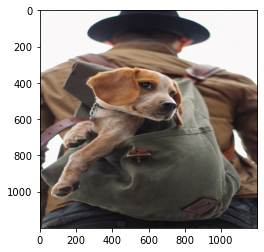

In [18]:
plt.imshow(img1)

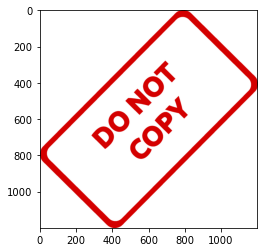

In [19]:
plt.imshow(img2)

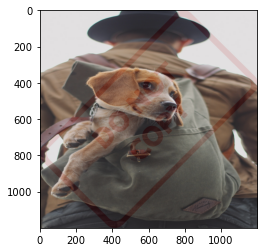

In [27]:
blended = cv2.addWeighted(src1=img1,alpha=0.8,src2=img2,beta=0.1, gamma=0.0)
plt.imshow(blended)

In [46]:
img1 = cv2.imread('../DATA/dog_backpack.png')
img2 = cv2.imread('../DATA/watermark_no_copy.png')

large_img = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
small_img = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

small_img = cv2.resize(small_img,(600,600))

In [47]:
large_img.shape

(1401, 934, 3)

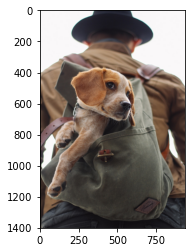

In [48]:
plt.imshow(large_img)

In [49]:
small_img.shape

(600, 600, 3)

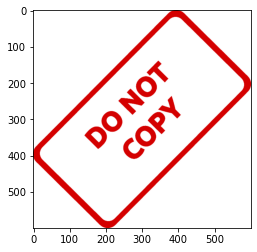

In [50]:
plt.imshow(small_img)

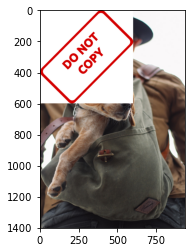

In [55]:
x_offset = 0
y_offset = 0

x_end = x_offset + small_img.shape[1]
y_end = y_offset + small_img.shape[0]

large_img[y_offset:y_end, x_offset:x_end] = small_img

plt.imshow(large_img)

# Blend images of different size

In [78]:
img1 = cv2.imread('../DATA/dog_backpack.png')
img2 = cv2.imread('../DATA/watermark_no_copy.png')

img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

img2 = cv2.resize(small_img,(600,600))

In [79]:
img1.shape

(1401, 934, 3)

In [94]:
x_offset = img1.shape[1] - 600
y_offset = img1.shape[0] - 600

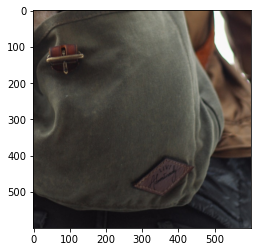

In [81]:
rows, cols, channels = img2.shape

roi = img1[y_offset:1401,x_offset:943]
plt.imshow(roi)

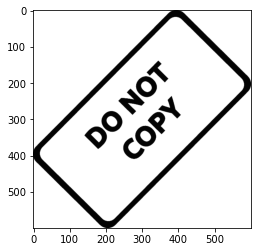

In [82]:
img2gray = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)
plt.imshow(img2gray, cmap="gray")

In [83]:
mask_inv = cv2.bitwise_not(img2gray)

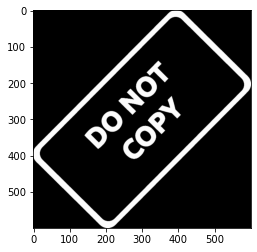

In [84]:
plt.imshow(mask_inv, cmap="gray")

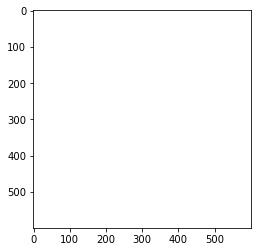

In [85]:
import numpy as np

white_background = np.full(img2.shape,255,dtype=np.uint8)
plt.imshow(white_background)

In [86]:
bk = cv2.bitwise_or(white_background,white_background, mask=mask_inv)
bk.shape

(600, 600, 3)

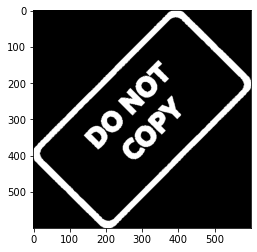

In [87]:
plt.imshow(bk)

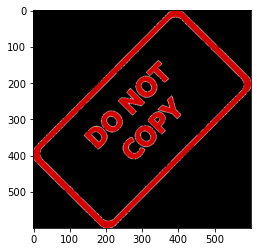

In [88]:
fg = cv2.bitwise_or(img2,img2,mask=mask_inv)
plt.imshow(fg)

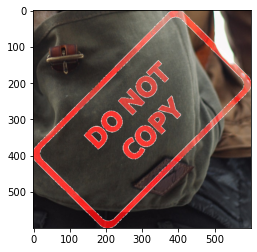

In [89]:
final_roi = cv2.bitwise_or(roi,fg)
plt.imshow(final_roi)

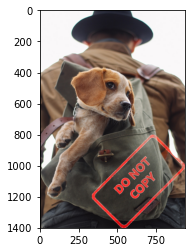

In [92]:
large_image = img1
small_image = final_roi

large_image[y_offset:y_offset+small_image.shape[0], x_offset:x_offset+small_image.shape[1]] = small_image
plt.imshow(large_image)